<a href="https://colab.research.google.com/github/Thunder-BoLT1/HeartRisk-AI/blob/main/HeartDiseaseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mazen Ahmed Data Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
#from prince import MCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/Heart_disease_statlog.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [ ]:
X, Y = df.iloc[:, :-1], df.iloc[:, -1]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 27.6 KB


In [ ]:
#Becasue That starts with 1-2-3 we subtract 1 to start classes with 0-1-2
print(X["thal"].unique())
X["thal"] -= 1
print(X["thal"].unique())
X.head()

[1 3 2]
[0 2 1]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,3,130,322,0,2,109,0,2.4,1,3,0
1,67,0,2,115,564,0,2,160,0,1.6,1,0,2
2,57,1,1,124,261,0,0,141,0,0.3,0,0,2
3,64,1,3,128,263,0,0,105,1,0.2,1,1,2
4,74,0,1,120,269,0,2,121,1,0.2,0,1,0


In [ ]:
#Seprate the features into continues and categorical features for proper correlation
X_Continues = X.drop(["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], axis=1)
X_Categorical = X[["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]]

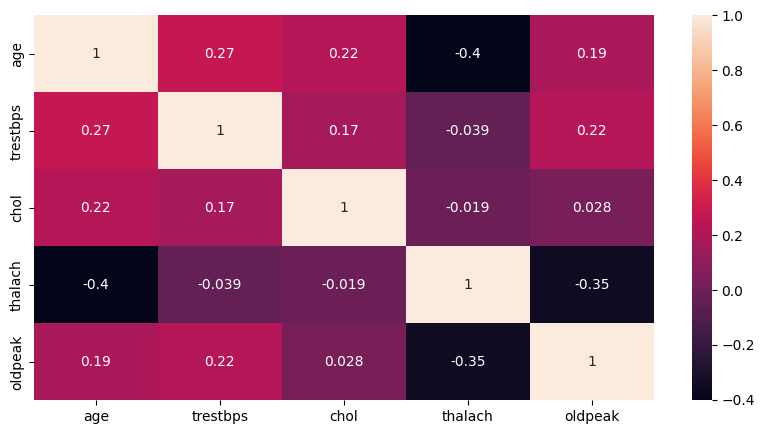

In [ ]:
#Correlation of Continues features with each other
corr_matrix = X_Continues.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#Correlation of Continues features with the target
corr_matrix_features = np.triu(corr_matrix, k = 1)
i, *_ = np.where(abs(corr_matrix_features) >= 0.8)
i = np.unique(i)
print(f"Number of Removed (Correlated) Features = {len(i)}")
X_Continues = X_Continues.drop(df.columns[i], axis=1)
X_Continues.head()

Number of Removed (Correlated) Features = 0


,age,trestbps,chol,thalach,oldpeak
0,70,130,322,109,2.4
1,67,115,564,160,1.6
2,57,124,261,141,0.3
3,64,128,263,105,0.2
4,74,120,269,121,0.2


In [ ]:
F_values, P_values = f_classif(X_Continues, Y)
i, *_ = np.where(P_values > 0.06)
print(f"Number of Removed (Correlated) Features = {len(i)}")
X_Continues = X_Continues.drop(X_Continues.columns[i], axis=1)
X_Continues.head()

Number of Removed (Correlated) Features = 0


,age,trestbps,chol,thalach,oldpeak
0,70,130,322,109,2.4
1,67,115,564,160,1.6
2,57,124,261,141,0.3
3,64,128,263,105,0.2
4,74,120,269,121,0.2


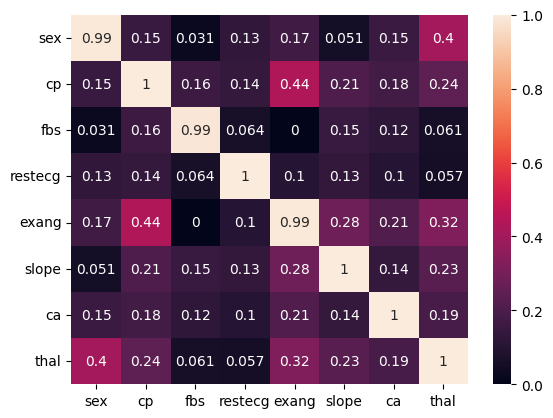

In [ ]:
#Correlation of Categricol Features With each other
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

corr_matrix = pd.DataFrame(index=X_Categorical.columns, columns=X_Categorical.columns)

for col1 in X_Categorical.columns:
    for col2 in X_Categorical.columns:
       corr_matrix.loc[col1, col2] = cramers_v(X_Categorical[col1], X_Categorical[col2])
corr_matrix = corr_matrix.astype(float)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_matrix_features = np.triu(corr_matrix, k = 1)
i, *_ = np.where(abs(corr_matrix_features) >= 0.7)
print(f"Number of Removed (Correlated) Features = {len(i)}")
X_Categorical = X_Categorical.drop(X_Categorical.columns[i], axis=1)
X_Categorical.head()

Number of Removed (Correlated) Features = 0


,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,0,2,0,1,3,0
1,0,2,0,2,0,1,0,2
2,1,1,0,0,0,0,0,2
3,1,3,0,0,1,1,1,2
4,0,1,0,2,1,0,1,0


In [ ]:
# Correlation of Categricol Features With the Target
corr_matrix = pd.DataFrame(index=X_Categorical.columns, columns=["Target"])

for col in X_Categorical.columns:
    corr_matrix.loc[col, "Target"] = cramers_v(X_Categorical[col], Y)
corr_matrix = corr_matrix.astype(float)

i, *_ = np.where(corr_matrix["Target"] < 0.2)
print(f"Number of Removed (Correlated) Features = {len(i)}")
X_Categorical = X_Categorical.drop(X_Categorical.columns[i], axis=1)
X_Categorical.head()

Number of Removed (Correlated) Features = 2


,sex,cp,exang,slope,ca,thal
0,1,3,0,1,3,0
1,0,2,0,1,0,2
2,1,1,0,0,0,2
3,1,3,1,1,1,2
4,0,1,1,0,1,0


In [ ]:
#Standrization of Continues Features
scaler = StandardScaler()
X_Continues = pd.DataFrame(scaler.fit_transform(X_Continues), columns=X_Continues.columns)
X_Continues.head()

,age,trestbps,chol,thalach,oldpeak
0,1.712094,-0.075410,1.402212,-1.759208,1.181012
1,1.382140,-0.916759,6.093004,0.446409,0.481153
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600


In [ ]:
#PCA for Continues Feature Reduction
pca = PCA(n_components=0.95) # Capture PC with variance of 95% of total variance
X_Continues = pd.DataFrame(pca.fit_transform(X_Continues), columns=[f"PC{i+1}" for i in range(len(pca.components_))])
X_Continues.head()

,PC1,PC2,PC3,PC4,PC5
0,2.720235,-0.175476,-1.252818,0.607055,0.155611
1,2.006747,3.921992,-3.103590,3.243061,0.864573
2,-0.063418,0.033519,-0.866189,-0.279082,-0.189030
3,1.202244,-0.499160,-1.562960,-0.798807,-0.848525
4,1.325683,-0.188261,-2.026733,-1.109943,0.367846


In [ ]:
#MCA for Categorical Feature Reduction
#mca = MCA(n_components=6)
#X_Categorical = mca.fit_transform(X_Categorical)
#X_Categorical.columns = [f"PC{i+1}" for i in range(len(X_Categorical.columns))]
#X_Categorical.head()

In [ ]:
# Reassign X to the new Columns after removing insignificant Features
X = pd.concat([X_Continues, X_Categorical], axis=1)
print(X.shape)
X.head()

(270, 11)


,PC1,PC2,PC3,PC4,PC5,sex,cp,exang,slope,ca,thal
0,2.720235,-0.175476,-1.252818,0.607055,0.155611,1,3,0,1,3,0
1,2.006747,3.921992,-3.103590,3.243061,0.864573,0,2,0,1,0,2
2,-0.063418,0.033519,-0.866189,-0.279082,-0.189030,1,1,0,0,0,2
3,1.202244,-0.499160,-1.562960,-0.798807,-0.848525,1,3,1,1,1,2
4,1.325683,-0.188261,-2.026733,-1.109943,0.367846,0,1,1,0,1,0


In [ ]:
#92.59%  in Logistic Reg and SVC(rbf, c=10, gamma=0.001)
#90.74% Gaussian Naive Bayes
#88 with random forest

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#model = LogisticRegression()
#model.fit(X_train, Y_train)
#y_pred = model.predict(X_test)
#print(f"Model Accuracy = {accuracy_score(Y_test, y_pred):.2%}")

Jana Visualization

In [ ]:
df = pd.concat([X, Y], axis=1)
df

,PC1,PC2,PC3,PC4,PC5,sex,cp,exang,slope,ca,thal,target
0,2.720235,-0.175476,-1.252818,0.607055,0.155611,1,3,0,1,3,0,1
1,2.006747,3.921992,-3.103590,3.243061,0.864573,0,2,0,1,0,2,0
2,-0.063418,0.033519,-0.866189,-0.279082,-0.189030,1,1,0,0,0,2,1
3,1.202244,-0.499160,-1.562960,-0.798807,-0.848525,1,3,1,1,1,2,0
4,1.325683,-0.188261,-2.026733,-1.109943,0.367846,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.001614,0.711020,1.927181,-1.434725,-0.688052,1,2,0,0,0,2,0
266,-1.753607,0.596999,-0.195769,0.395619,-0.152418,1,1,0,0,0,2,0
267,0.541922,0.805398,0.062724,0.355325,-0.005432,0,1,0,1,0,0,0
268,-0.170893,-0.372699,0.388888,-1.247717,-0.130261,1,3,0,1,0,1,0


In [ ]:
df.shape

(270, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     270 non-null    float64
 1   PC2     270 non-null    float64
 2   PC3     270 non-null    float64
 3   PC4     270 non-null    float64
 4   PC5     270 non-null    float64
 5   sex     270 non-null    int64  
 6   cp      270 non-null    int64  
 7   exang   270 non-null    int64  
 8   slope   270 non-null    int64  
 9   ca      270 non-null    int64  
 10  thal    270 non-null    int64  
 11  target  270 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 25.4 KB


In [ ]:
df.isnull().sum()

,0
PC1,0
PC2,0
PC3,0
PC4,0
PC5,0
sex,0
cp,0
exang,0
slope,0
ca,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,PC1,PC2,PC3,PC4,PC5,sex,cp,exang,slope,ca,thal,target
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.302685e-17,-1.315820e-17,1.315820e-17,-1.973730e-17,1.973730e-17,0.677778,2.174074,0.329630,0.585185,0.670370,0.822222,0.444444
std,1.349792e+00,1.055553e+00,9.430025e-01,8.533696e-01,6.818826e-01,0.468195,0.950090,0.470952,0.614390,0.943896,0.959140,0.497827
min,-3.380840e+00,-2.761048e+00,-3.103590e+00,-2.209913e+00,-1.948369e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.330557e-01,-7.123482e-01,-5.665319e-01,-4.761675e-01,-4.736471e-01,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.058294e-02,-9.186002e-03,-3.051616e-03,-5.214924e-02,4.178524e-02,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.098138e+00,6.643121e-01,5.060315e-01,5.235546e-01,4.359467e-01,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.362138e+00,3.921992e+00,3.346572e+00,3.243061e+00,1.728817e+00,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000


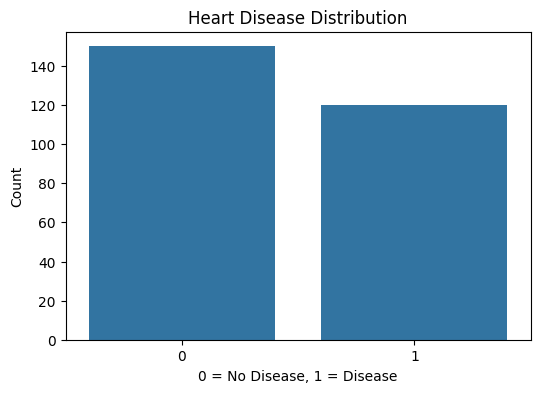

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Count')
plt.show()

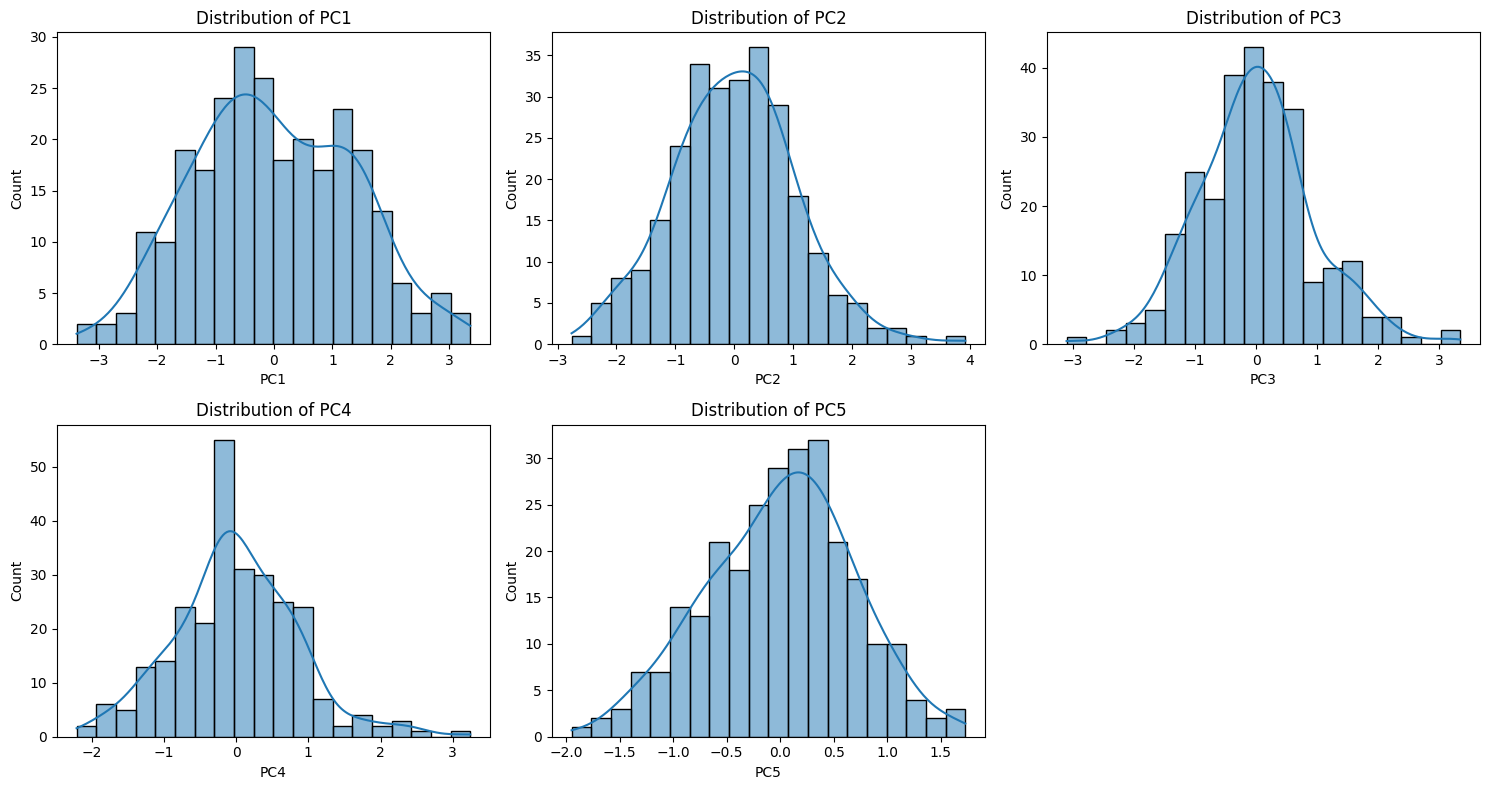

In [ ]:
n_cols = len(X_Continues.columns)

n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(X_Continues.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


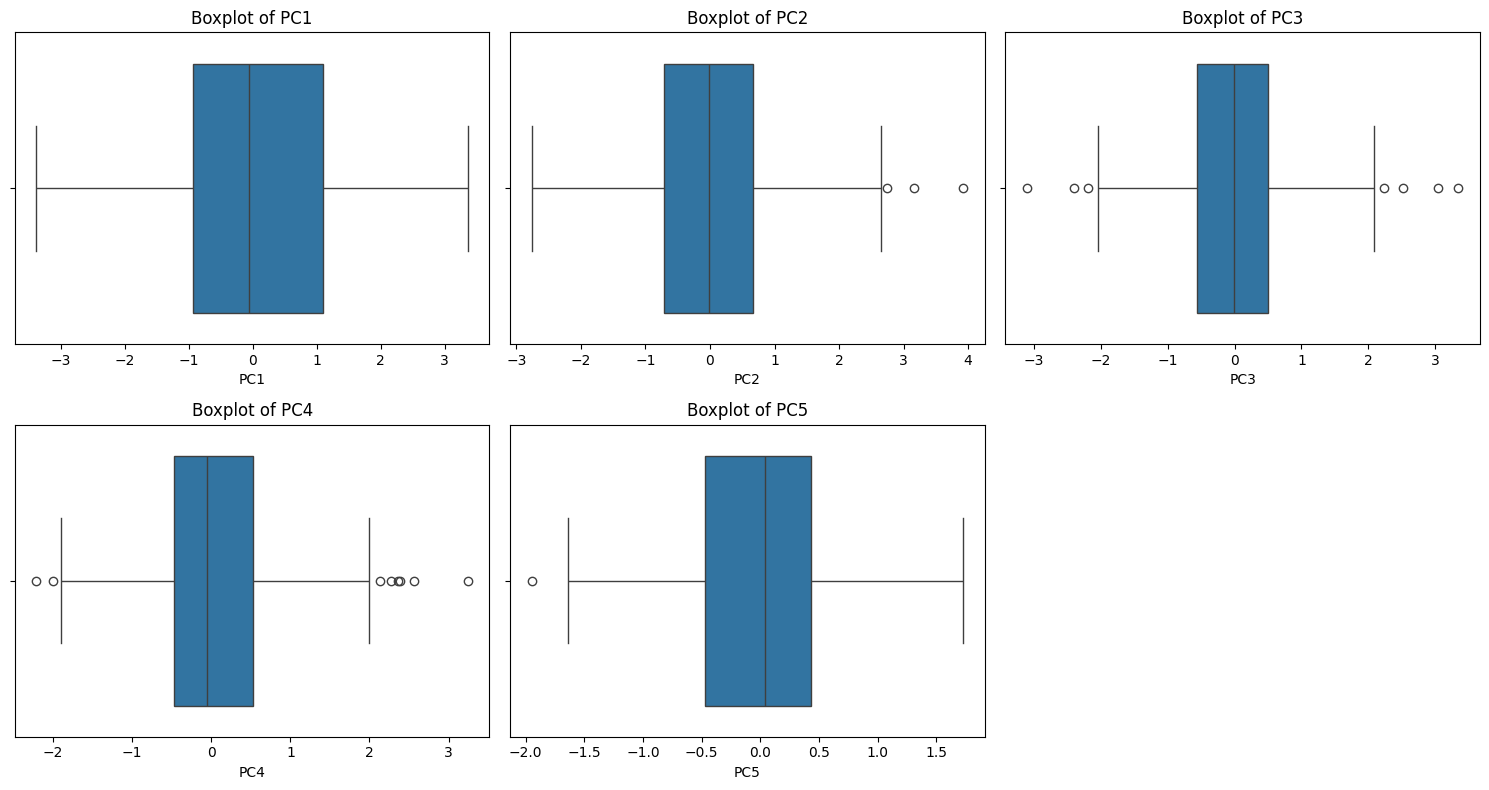

In [ ]:
n_cols = len(X_Continues.columns)
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(X_Continues.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = X_Continues.columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} has {len(outliers)} outliers")
    # Remove/Cap Outliers (capping)
    #df[col] = df[col].clip(lower, upper)

PC1 has 0 outliers
PC2 has 3 outliers
PC3 has 7 outliers
PC4 has 8 outliers
PC5 has 1 outliers


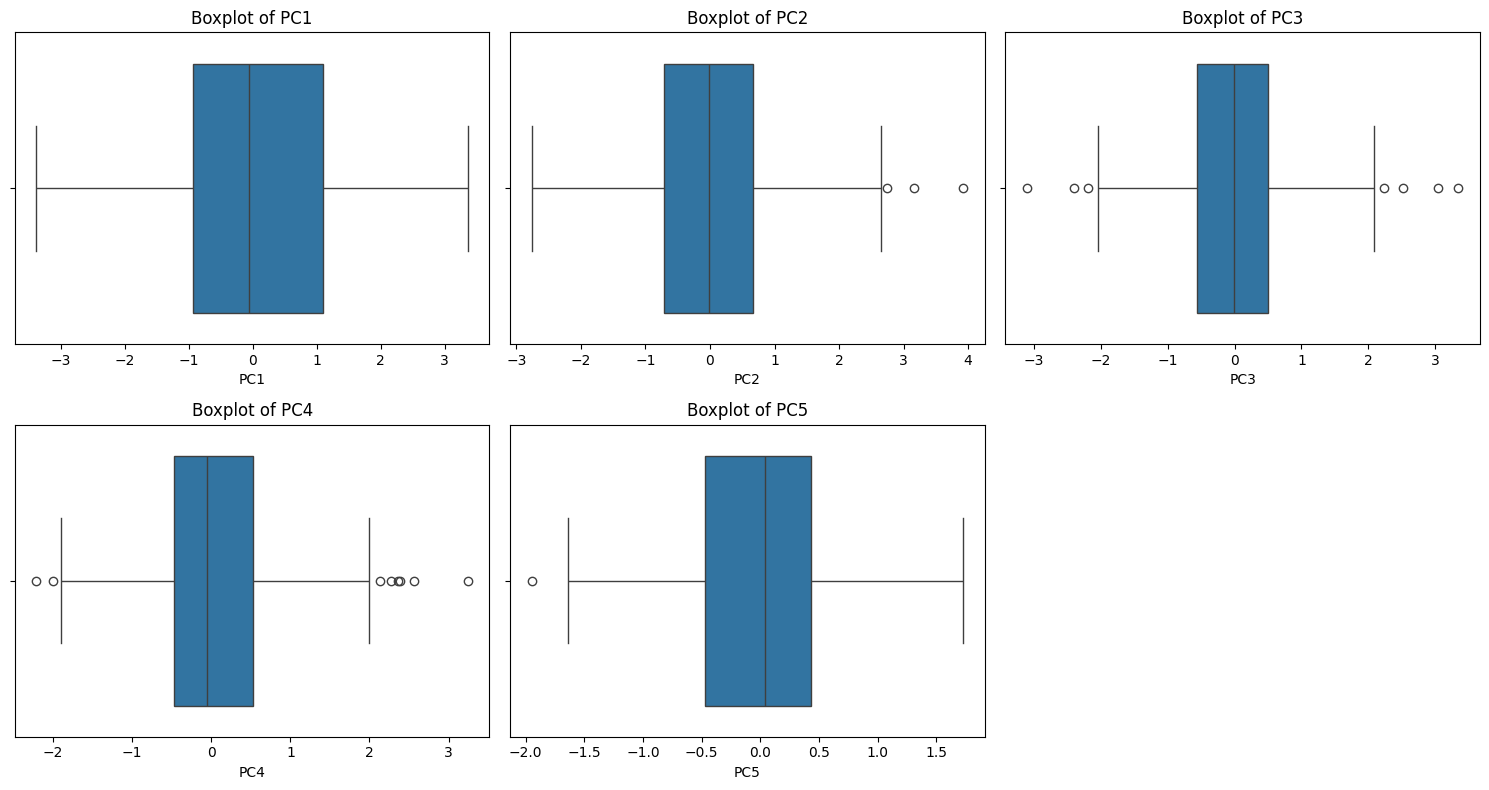

In [ ]:
n_cols = len(X_Continues.columns)
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(X_Continues.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


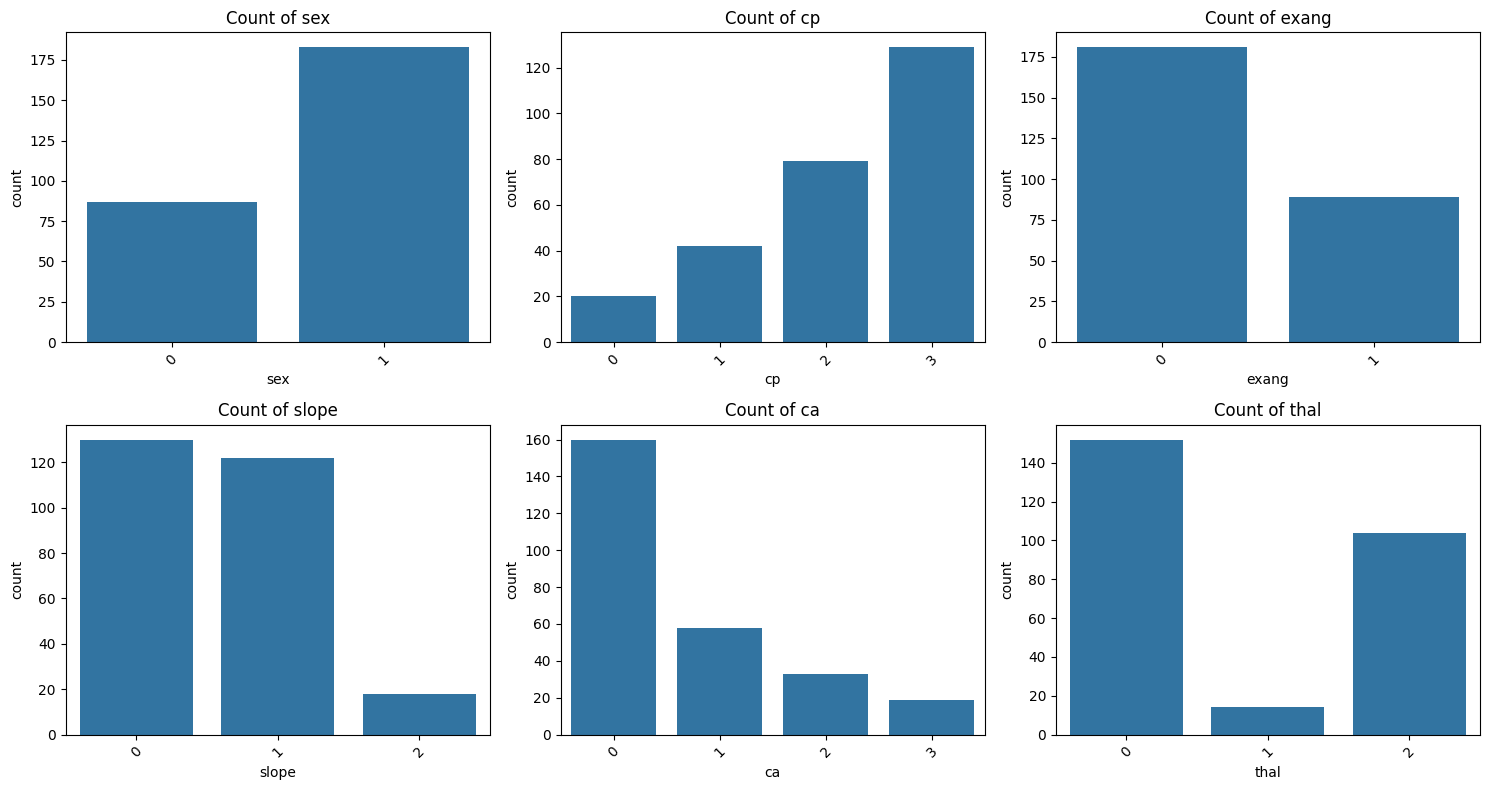

In [ ]:
n_cols = len(X_Categorical.columns)
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(X_Categorical.columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Models

In [ ]:
X = df.drop('target', axis=1)
Y = df['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
ModelsEval = {}

LogesticRegression

In [ ]:
LogisticRegModel = LogisticRegression()

In [ ]:
LogisticRegModel.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = LogisticRegModel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
cnf_matrix = confusion_matrix(Y_test, y_pred)

In [ ]:
ModelsEval['LogisticRegression'] = (accuracy, confusion_matrix(Y_test, y_pred), LogisticRegModel)

SVM

In [ ]:
maxAccuracy = 0
for kernel in ['linear', 'poly', 'rbf']:
  for c in [0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01, 0.1, 1]:
      SVMModel = SVC(kernel=kernel, C=c, gamma=gamma)
      SVMModel.fit(X_train, Y_train)
      y_pred = SVMModel.predict(X_test)
      accuracy = accuracy_score(Y_test, y_pred)
      if(accuracy > maxAccuracy):
        maxAccuracy = accuracy
        cnf_matrix = confusion_matrix(Y_test, y_pred)
        ModelsEval['SVM'] = (accuracy, confusion_matrix(Y_test, y_pred), SVMModel)

KNN

In [ ]:
maxAccuracy = 0
for k in range(1, 21):
  KNNModel = KNeighborsClassifier(n_neighbors=k)
  KNNModel.fit(X_train, Y_train)
  y_pred = KNNModel.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  if(accuracy > maxAccuracy):
    maxAccuracy = accuracy
    cnf_matrix = confusion_matrix(Y_test, y_pred)
    ModelsEval['KNN'] = (accuracy, confusion_matrix(Y_test, y_pred), KNNModel)

DecisionTree

In [ ]:
maxAccuracy = 0
for depth in range(1, 21):
  for criterion in ['gini', 'entropy']:
    DecisionTreeModel = DecisionTreeClassifier(criterion=criterion, max_depth=depth)
    DecisionTreeModel.fit(X_train, Y_train)
    y_pred = KNNModel.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    if(accuracy > maxAccuracy):
      maxAccuracy = accuracy
      cnf_matrix = confusion_matrix(Y_test, y_pred)
      ModelsEval['DT'] = (accuracy, confusion_matrix(Y_test, y_pred), DecisionTreeModel)

Naive Bayes

In [ ]:
NaiveBayesModel = GaussianNB()
NaiveBayesModel.fit(X_train, Y_train)
y_pred = NaiveBayesModel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
cnf_matrix = confusion_matrix(Y_test, y_pred)
ModelsEval['NaiveBayes'] = (accuracy, confusion_matrix(Y_test, y_pred), NaiveBayesModel)

Models Comparisons

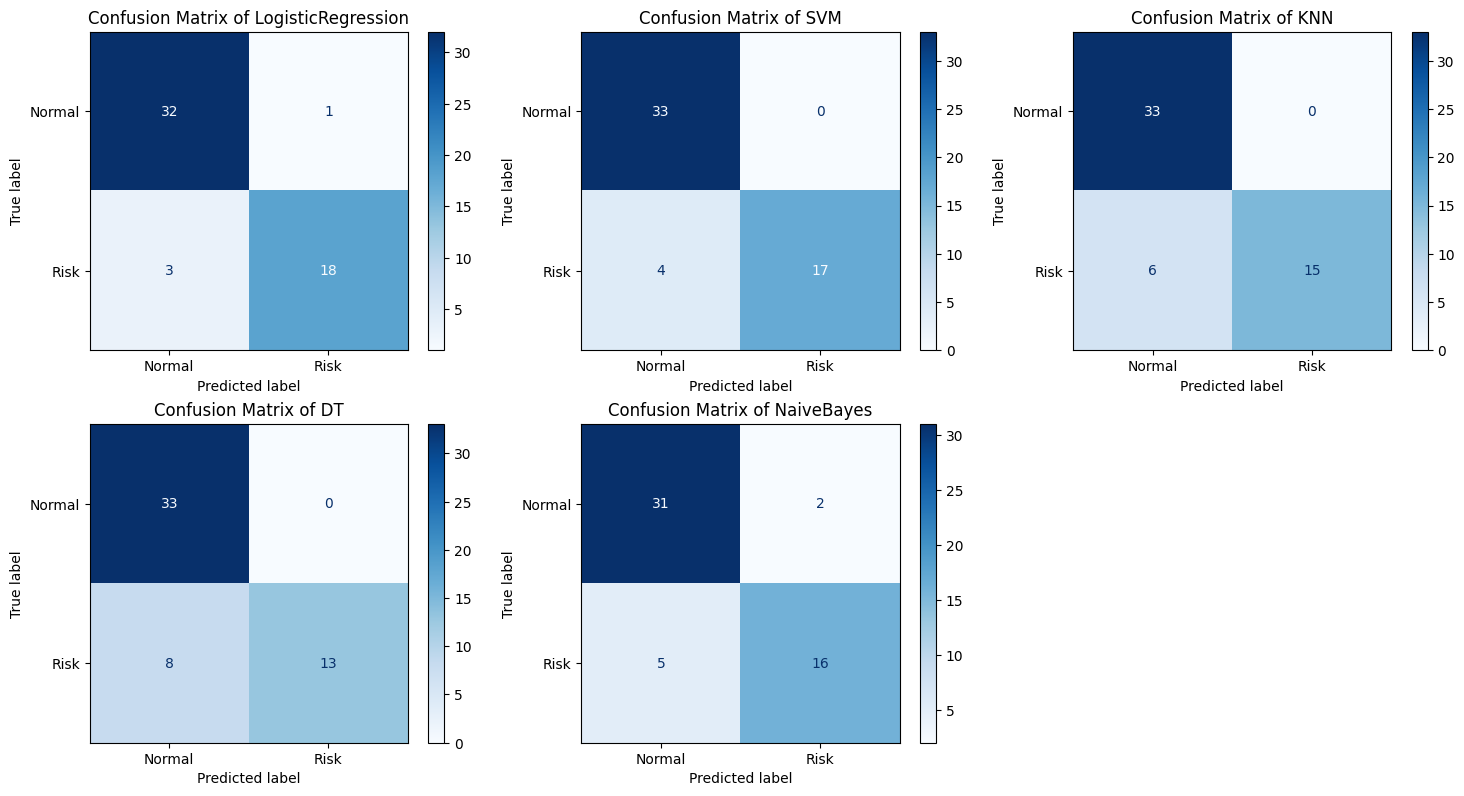

In [ ]:
n_cols = len(ModelsEval.keys())
n_rows = int(np.ceil(n_cols / 3))

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, model in enumerate(ModelsEval.keys()):
    disp = ConfusionMatrixDisplay(confusion_matrix=ModelsEval[model][1], display_labels=["Normal", "Risk"])
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix of {model}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

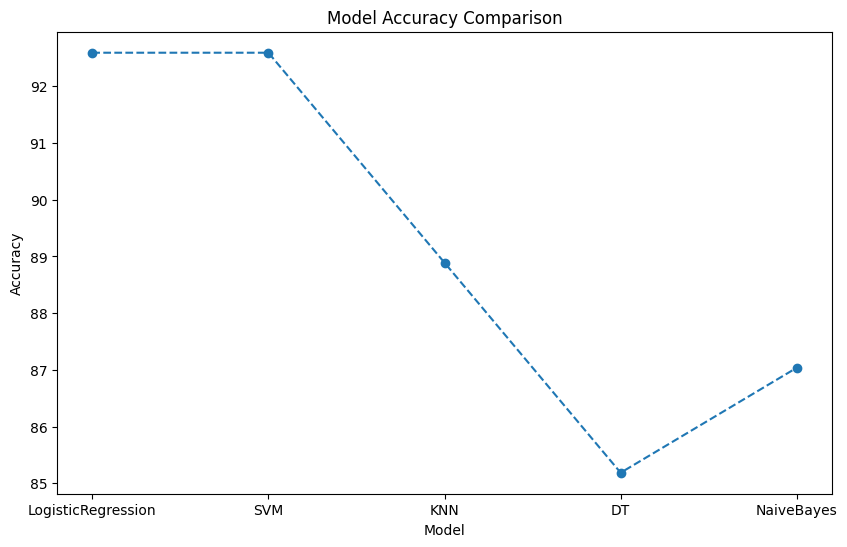

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ModelsEval.keys(), [ModelsEval[model][0]*100 for model in ModelsEval.keys()], marker="o", linestyle="--")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

**SVM & Logistic Regression** Have the Same Accuracy of 92.59% But we will **consider the Logestic Regression Model as it has Less False Positive** and this is very important in medical **Fields**

In [ ]:
filename = 'finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(ModelsEval['LogisticRegression'][0], file)
    pickle.dump(ModelsEval['LogisticRegression'][2], file)
    pickle.dump(scaler, file)
    pickle.dump(pca, file)